In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
n_points = 500
X, y = datasets.make_circles(n_samples=n_points, random_state =123, noise=0.1, factor=0.2)
print(X)
print(y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

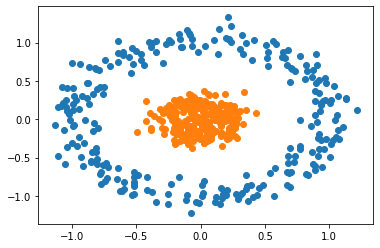

In [4]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])

In [5]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
h = model.fit(x=X, y=y, verbose = 1, epochs=100, shuffle=True, batch_size = 20)

Epoch 1/100
500/500 [==============================] - 0s 340us/step - loss: 0.6959 - accuracy: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 85us/step - loss: 0.6937 - accuracy: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 86us/step - loss: 0.6925 - accuracy: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 84us/step - loss: 0.6916 - accuracy: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 81us/step - loss: 0.6905 - accuracy: 0.6300
Epoch 6/100
500/500 [==============================] - 0s 85us/step - loss: 0.6890 - accuracy: 0.3620
Epoch 7/100
500/500 [==============================] - 0s 85us/step - loss: 0.6865 - accuracy: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 88us/step - loss: 0.6838 - accuracy: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 81us/step - loss: 0.6795 - accuracy: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 144us/step - loss: 0.6

500/500 [==============================] - 0s 81us/step - loss: 0.0347 - accuracy: 0.9980
Epoch 81/100
500/500 [==============================] - 0s 91us/step - loss: 0.0339 - accuracy: 0.9980
Epoch 82/100
500/500 [==============================] - 0s 79us/step - loss: 0.0329 - accuracy: 0.9980
Epoch 83/100
500/500 [==============================] - 0s 75us/step - loss: 0.0320 - accuracy: 0.9980
Epoch 84/100
500/500 [==============================] - 0s 76us/step - loss: 0.0312 - accuracy: 0.9980
Epoch 85/100
500/500 [==============================] - 0s 74us/step - loss: 0.0305 - accuracy: 0.9980
Epoch 86/100
500/500 [==============================] - 0s 77us/step - loss: 0.0297 - accuracy: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 85us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 81us/step - loss: 0.0283 - accuracy: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 80us/step - loss: 0.0276 - 

Text(0.5, 1.0, 'accuracy')

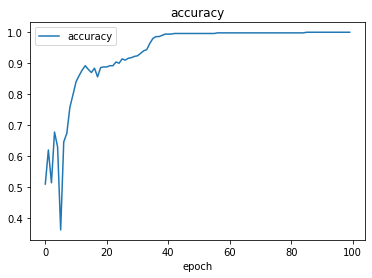

In [7]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'Loss')

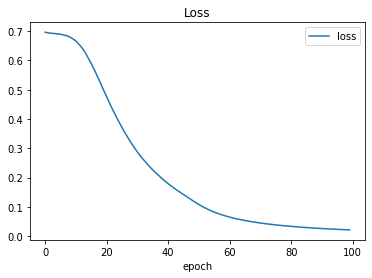

In [8]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('Loss')

In [11]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+ 0.25, 50)
    # Square two dimensional array that is trained
    # from the number high dot mesh grid function
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    prediction_func = model.predict(grid)
#   reshape array to have the same dimensions as xx or yy
    z = prediction_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

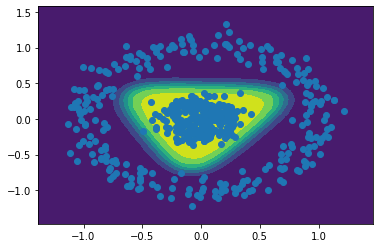

In [13]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_points,0], X[:n_points,1])
plt.scatter(X[n_points:,0], X[n_points:,1])

prediction is:  [[0.0250742]]


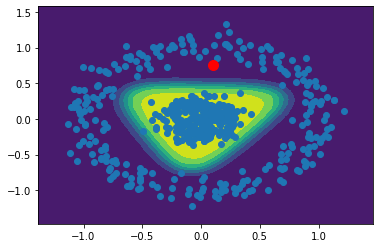

In [17]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_points,0], X[:n_points,1])
plt.scatter(X[n_points:,0], X[n_points:,1])
x = 0.1
y= 0.75
points = np.array([[x, y]])
prediction = model.predict(points)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ", prediction)

prediction is:  [[0.9903144]]


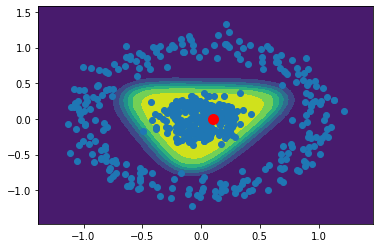

In [18]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_points,0], X[:n_points,1])
plt.scatter(X[n_points:,0], X[n_points:,1])
x = 0.1
y= 0
points = np.array([[x, y]])
prediction = model.predict(points)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ", prediction)